Our project looks to examine the key factors influencing NBA player scoring, utilizing a comprehensive dataset of player statistics from 1950 to 2017. By examining a wide range of features from our dataset—including player position, minutes played, field goal percentage, and usage rate—we seek to identify the elements that contribute most significantly to a player's scoring ability, and to be able to predict future stats with our supervised learning model (supervised because we have quantitative labeled data). In addition, we want to know which combinations of these features are the best predictors for high point totals in an NBA player's entire career. The insights gained from this study can be a valuable resource for sports bettors, fantasy basketball players, and even the coaches or GMs who manage the team themselves when trying to pick players with the best scoring potential.

In [35]:
!git clone https://github.com/jonathanaduong/CSE151AGroupProject.git

fatal: destination path 'CSE151AGroupProject' already exists and is not an empty directory.


In [2]:
nbadf = pd.read_csv('CSE151AGroupProject/Seasons_Stats.csv')
nbadf.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
nbadf.dtypes

Unnamed: 0      int64
Year          float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
PER           float64
TS%           float64
3PAr          float64
FTr           float64
ORB%          float64
DRB%          float64
TRB%          float64
AST%          float64
STL%          float64
BLK%          float64
TOV%          float64
USG%          float64
blanl         float64
OWS           float64
DWS           float64
WS            float64
WS/48         float64
blank2        float64
OBPM          float64
DBPM          float64
BPM           float64
VORP          float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB       

In [4]:
print(nbadf.Pos.unique())

['G-F' 'SG' 'SF' 'F' 'G' 'F-C' 'PG' 'F-G' 'C' 'PF' 'C-F' nan 'PF-C'
 'SF-SG' 'C-PF' 'SG-SF' 'PF-SF' 'SF-PF' 'SG-PG' 'SF-PG' 'C-SF' 'PG-SG'
 'PG-SF' 'SG-PF']


In [5]:
nbadf.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [6]:
print(nbadf.Tm.unique())

['FTW' 'INO' 'CHS' 'TOT' 'DNN' 'NYK' 'TRI' 'AND' 'PHW' 'WAT' 'SHE' 'ROC'
 'BLB' 'MNL' 'SYR' 'WSC' 'BOS' 'STB' nan 'MLH' 'STL' 'DET' 'CIN' 'LAL'
 'CHP' 'SFW' 'CHZ' 'BAL' 'PHI' 'CHI' 'SDR' 'SEA' 'MIL' 'ATL' 'PHO' 'POR'
 'CLE' 'BUF' 'HOU' 'GSW' 'KCO' 'CAP' 'NOJ' 'WSB' 'KCK' 'IND' 'NYN' 'DEN'
 'SAS' 'NJN' 'SDC' 'UTA' 'DAL' 'LAC' 'SAC' 'CHH' 'MIA' 'ORL' 'MIN' 'VAN'
 'TOR' 'WAS' 'MEM' 'NOH' 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']


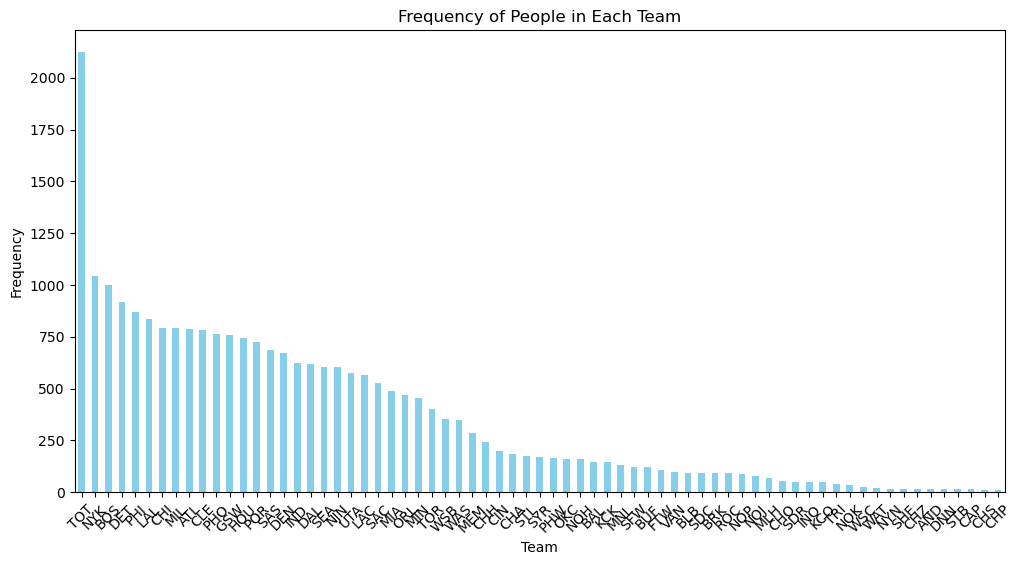

In [7]:
team_counts = nbadf['Tm'].value_counts()

plt.figure(figsize=(12, 6))
team_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of People in Each Team')
plt.xlabel('Team')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.pairplot(nbadf[['PTS', 'G', 'MP', 'FG%', 'FGA', 'FT%', 'FTA']])

<Axes: >

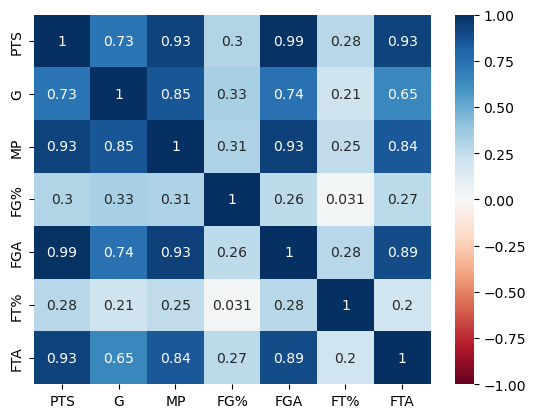

In [ ]:
corr = nbadf[['PTS', 'G', 'MP', 'FG%', 'FGA', 'FT%', 'FTA']].corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [ ]:
nbadf.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [ ]:
nbadf.isnull().sum().sort_values(ascending=False)

blank2        24691
blanl         24691
3P%            9275
GS             6458
3PAr           5852
3PA            5764
3P             5764
TOV%           5109
USG%           5051
TOV            5046
STL%           3899
ORB%           3899
DRB%           3899
BLK%           3899
STL            3894
BPM            3894
VORP           3894
DRB            3894
BLK            3894
DBPM           3894
OBPM           3894
ORB            3894
TRB%           3120
AST%           2136
FT%             925
PER             590
WS/48           590
MP              553
TRB             379
2P%             195
FG%             166
FTr             166
eFG%            166
TS%             153
WS              106
DWS             106
OWS             106
Age              75
AST              67
FTA              67
PF               67
PTS              67
FT               67
2PA              67
2P               67
FGA              67
FG               67
Year             67
G                67
Tm               67


The data set tracks players' statistics season to season from 1950-2017. The categorical features we plan on observing are Pos (Player position) and Tm (Team they played for) and the numerical features that we plan to observe are G (Games played), MP (Total minutes played), FG% (Percentage hots made in a season), FGA (Shots attempted in a season), FT% (Percentage of free throws made in a season), and FTA (Free throws attempted in a season).

We plan on predicting the points scored per game for an individual, so we need to observe the games played each season for a player (G) as FGA, FTA, and MP are the totals for points scored, field goals shot, free throws shot, and minutes played for the season rather than a per game average, which we would prefer to analyze. We will also be seeing if player position makes a difference in the point scored per game.

The data set has 24,691 different observations, although there are repeat players since they played across multiple years. For scale, we plan to use minMax scaling to ensure that the data is normalized. There are many null/NaN values across seasons since these statistics were not recorded at the time, such as blocks or steals.


### How will you preprocess your data :
- to (one-hot) encode categorical data like Team, Positions
- for null/nan values, we will replace it with an adjusted mean values
- for each of the season total categories (PTS, TRB, AST), we will divide it by the games played to get the per game average.
- use min-max to scale since we do

In [ ]:
processed_nbadf = nbadf.copy()
removeFeat =  ['Unnamed: 0', 'blanl' , 'blank2', 'GS', 'Player', 'ORB', 'DRB', '3P', '2P', 'FG']
processed_nbadf = processed_nbadf.drop(removeFeat, axis=1)

#fill NaNs in each non-category column
for i in processed_nbadf.columns:
  if i == 'Year': continue
  if i == 'MP': continue
  if processed_nbadf[i].dtype == 'object': continue
  #by mean imputation grouped by year:
  processed_nbadf[i] = processed_nbadf.groupby('Year')[i].transform(lambda x: x.fillna(x.mean()))
  col_mean = processed_nbadf[i].mean()
  #by global average:
  processed_nbadf[i] = processed_nbadf[i].fillna(col_mean)

#compute average MP per game
avg_MP = processed_nbadf["MP"].mean()
avg_G = processed_nbadf["G"].mean()
processed_nbadf['MP_per_game'] = processed_nbadf['MP'] / processed_nbadf['G']
#fill NaNs with the global average
processed_nbadf['MP_per_game'] = processed_nbadf['MP_per_game'].fillna(avg_MP / avg_G)

#remove remaining NaNs
processed_nbadf.dropna(inplace= True)

# #one-hot encode categories
processed_nbadf = pd.get_dummies(processed_nbadf, columns=['Tm', 'Pos'])
processed_nbadf

#compute per game and fill out na values with mean
feature_cols = []
for column in ['PTS', 'TRB', 'AST', 'MP', 'FGA', '3PA', '2PA', 'FTA']:
  col = column + '_per_game'
  feature_cols.append(col)
  processed_nbadf[col] = processed_nbadf[column] / processed_nbadf['G']
  processed_nbadf.drop(column, axis = 1)

processed_nbadf.head()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,PTS_per_game,TRB_per_game,AST_per_game,FGA_per_game,3PA_per_game,2PA_per_game,FTA_per_game
488,1952.0,23.0,66.0,2939.0,25.5,0.546,0.158679,0.579,6.181471,13.708809,...,False,False,False,25.363636,11.287879,2.575758,18.515152,0.963704,18.515152,10.712121
489,1952.0,31.0,44.0,494.0,10.8,0.343,0.158679,0.317,6.181471,13.708809,...,False,False,False,2.863636,1.840909,1.590909,3.659091,1.445556,3.659091,1.159091
490,1952.0,28.0,62.0,2014.0,15.8,0.409,0.158679,0.427,6.181471,13.708809,...,False,False,False,12.596774,9.693548,2.209677,12.967742,1.025879,12.967742,5.532258
491,1952.0,27.0,66.0,2344.0,15.9,0.419,0.158679,0.208,6.181471,13.708809,...,False,False,False,12.424242,6.515152,3.863636,13.590909,0.963704,13.590909,2.833333
492,1952.0,22.0,4.0,55.0,7.8,0.319,0.158679,0.318,6.181471,13.708809,...,False,False,False,4.000000,4.250000,1.000000,5.500000,15.901120,5.500000,1.750000


## Model 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_nbadf[['TRB_per_game', 'AST_per_game', 'MP_per_game', 'FGA_per_game', '3PA_per_game', '2PA_per_game', 'FTA_per_game']], processed_nbadf.PTS_per_game, test_size=0.2, random_state=21)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
print(X_train.shape[0]/processed_nbadf.shape[0])
print(X_test.shape[0]/processed_nbadf.shape[0])

0.7999834286187754
0.2000165713812246


Testing MSE: 22.97


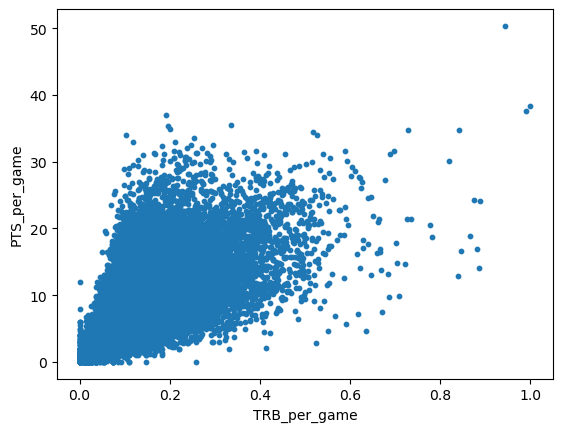

Testing MSE: 23.57


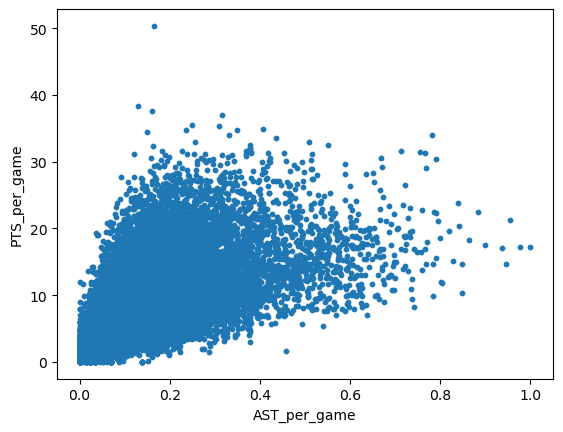

Testing MSE: 7.39


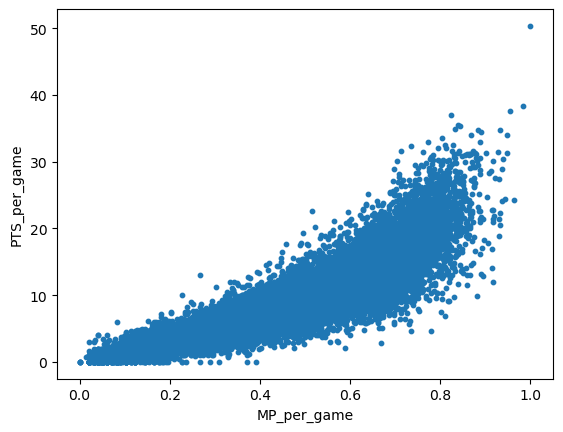

Testing MSE: 1.54


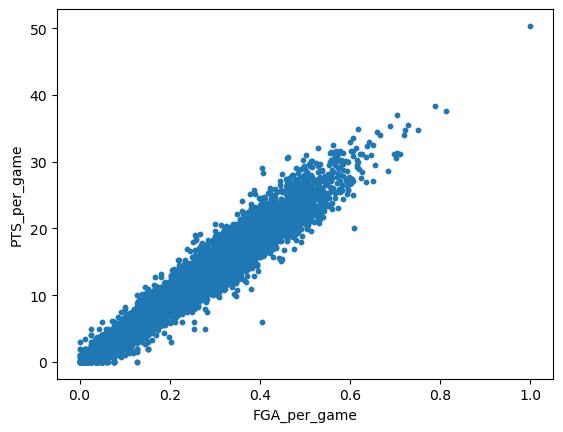

Testing MSE: 37.86


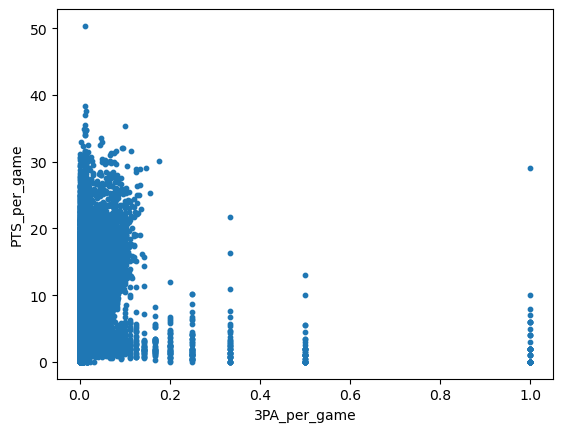

Testing MSE: 4.79


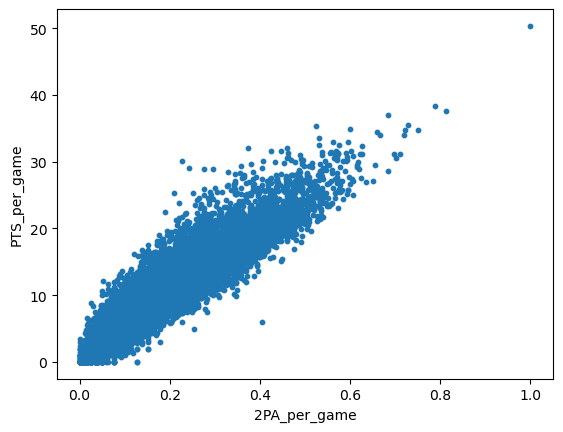

Testing MSE: 7.85


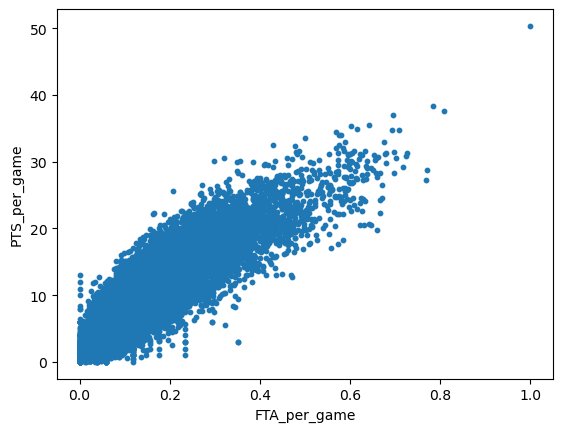

In [ ]:
for i in ['TRB_per_game', 'AST_per_game', 'MP_per_game', 'FGA_per_game', '3PA_per_game', '2PA_per_game', 'FTA_per_game']:
  linearreg = LinearRegression()
  linearmodel = linearreg.fit(X_train[i].values.reshape(-1,1), y_train)
  yhat_test = linearreg.predict(X_test[i].values.reshape(-1,1))
  yhat_train = linearreg.predict(X_train[i].values.reshape(-1,1))
  print('Testing MSE: %.2f' % mean_squared_error(y_test, yhat_test))
  plt.scatter(X_train[i],y_train, s=10)
  plt.xlabel(i)
  plt.ylabel('PTS_per_game')
  plt.show()

In [ ]:
linearreg = LinearRegression()
## y_train and y_test serve as ground truth labels, representing the actual points per game derived from our dataset. These values were calculated by dividing each player’s total points in the season by the number of games played, providing a reliable basis for evaluating the model's predictions.
linearmodel = linearreg.fit(X_train, y_train)
print(linearmodel.coef_)
yhat_test = linearreg.predict(X_test)
yhat_train = linearreg.predict(X_train)
print('Testing MSE: %.2f' % mean_squared_error(y_test, yhat_test))
print('Training MSE: %.2f' % mean_squared_error(y_train, yhat_train))

[-3.24748424 -2.15593365  1.23417173 41.55781426 -0.60273529 -6.64406517
 10.81840061  6.30965222  0.329595   11.33247946]
Testing MSE: 0.46
Training MSE: 0.43


## Conclusion
The conclusion of our 1st model shows our model can achieve a moderate level of accuracy in predicting PPG. To improve our model in the future, we might want to exclude most of the data from 1950s to 1980s because lots of the data had to be imputed and are carried by global averages.

# Model 2

In model 2, we included additional features, such as Win Shares, box plus-minus and player efficiency ratings and fitted them into different degrees of polynomial regressions ranging from 1 to 4.

Polynomial Regression (Degree=1)
Train MSE: 0.43
Test MSE: 0.46
Polynomial Regression (Degree=2)
Train MSE: 0.27
Test MSE: 0.28
Polynomial Regression (Degree=3)
Train MSE: 0.23
Test MSE: 0.27
Polynomial Regression (Degree=4)
Train MSE: 0.19
Test MSE: 20.44


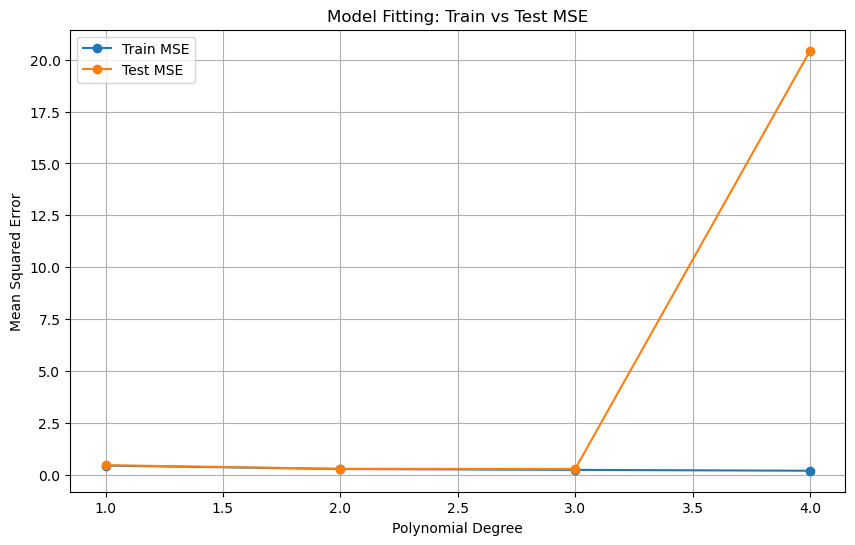

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(processed_nbadf[['TRB_per_game', 'AST_per_game', 'MP_per_game', 'FGA_per_game', '3PA_per_game', '2PA_per_game', 'FTA_per_game','WS','BPM', 'PER']], processed_nbadf.PTS_per_game, test_size=0.2, random_state=21)

# min max scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# turn X_train and X_test into
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

## for the fitting graph
train_mse_list = []
test_mse_list = []

# polynomial degree to add complexity to the model
degrees = [1,2,3,4]
for degree in degrees:
  initialDegree = degree
  poly = PolynomialFeatures(degree=initialDegree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model2 = LinearRegression()
  model2.fit(X_train_poly, y_train)
  y_train_pred = model2.predict(X_train_poly)
  y_test_pred = model2.predict(X_test_poly)


  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)

  print(f"Polynomial Regression (Degree={initialDegree})")
  print(f"Train MSE: {train_mse:.2f}")
  print(f"Test MSE: {test_mse:.2f}")

## WILL CHOOSE Degree 3 for Polynomial Regression, better performance with
## least signs of overfitting
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse_list, marker='o', label='Train MSE')
plt.plot(degrees, test_mse_list, marker='o', label='Test MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Fitting: Train vs Test MSE')
plt.legend()
plt.grid(True)
plt.show()

3. Our model lies in the middle of this fitting graph, where degree equals 3. A decently complex model, which makes sure we are not underfitting while also minimizing the difference between our training and testing error

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
y_test_pred = model2.predict(X_test_poly)
y_test_pred
threshold = 1
newY = y_test - y_test_pred

## in the context of this question any Correct is ppg predicted within .5 of the true values
## while FN and FP are calculated as any values not within .5 of the true values
correct = len(newY[abs(newY) < .5])
FNFP = len(y_test) - correct
accuracy = correct / len(y_test)
print(f'Correct Values: ', correct)
print(f'FNFP Values: ', FNFP)
print(f'Accuracy: ', accuracy)

Correct Values:  4236
FNFP Values:  592
Accuracy:  0.8773819386909694


# Model 3
For our third model, we will predict a player's **Points Per Game** as a **Category**. Specifically, we will bin PPG as follows:

|Bin|Score|
|----------|-------|
|PPG <= 25%|"Low"|
|25% < PPG <= 50%|"Medium"|
|50% < PPG <= 75%|"High"|
|PPG > 75%|"Very High"|

The thresholds are printed below:

In [ ]:
cols = ['PTS_per_game']
#ppg mean is 8.3; max is 50
desc = processed_nbadf[cols].describe()
desc

,PTS_per_game
count,24138.000000
mean,8.337281
std,6.102712
min,0.000000
25%,3.573945
50%,6.820704
75%,11.805116
max,50.362500


We will perform additional preprocessing for this version of our data by adding a new column into our modified DataFrame called "PPG Bin"

In [ ]:
bins = {"Low": desc["PTS_per_game"]["25%"], "Medium": desc["PTS_per_game"]["50%"], "High": desc["PTS_per_game"]["75%"]}
print(bins)
nbadf_2 = processed_nbadf.copy()

#Convert keys into numeric vals, Very High = 3
def PPG_binner(value):
    if value < bins['Low']:
        return 0
    elif value < bins['Medium']:
        return 1
    elif value < bins['High']:
        return 2
    else:
        return 3

#Apply the function to PTS_per_game
nbadf_2['PPG_Bins'] = nbadf_2['PTS_per_game'].apply(PPG_binner)
nbadf_2 = nbadf_2.drop("PTS_per_game", axis=1)
#Drop the PTS_per_game column
nbadf_2.head()

{'Low': 3.573944890129055, 'Medium': 6.820704171450441, 'High': 11.805115616091225}


,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF,TRB_per_game,AST_per_game,FGA_per_game,3PA_per_game,2PA_per_game,FTA_per_game,PPG_Bins
488,1952.0,23.0,66.0,2939.0,25.5,0.546,0.158679,0.579,6.181471,13.708809,...,False,False,False,11.287879,2.575758,18.515152,0.963704,18.515152,10.712121,3
489,1952.0,31.0,44.0,494.0,10.8,0.343,0.158679,0.317,6.181471,13.708809,...,False,False,False,1.840909,1.590909,3.659091,1.445556,3.659091,1.159091,0
490,1952.0,28.0,62.0,2014.0,15.8,0.409,0.158679,0.427,6.181471,13.708809,...,False,False,False,9.693548,2.209677,12.967742,1.025879,12.967742,5.532258,3
491,1952.0,27.0,66.0,2344.0,15.9,0.419,0.158679,0.208,6.181471,13.708809,...,False,False,False,6.515152,3.863636,13.590909,0.963704,13.590909,2.833333,3
492,1952.0,22.0,4.0,55.0,7.8,0.319,0.158679,0.318,6.181471,13.708809,...,False,False,False,4.250000,1.000000,5.500000,15.901120,5.500000,1.750000,1


Now we can perform either PCA or SVD using the same dimensions as we did in our previous model. 

We will not take into account the position of a player. This is because PCA using positions results in 5 clusters, binned most likely by the 5 main positions in a basketball team. Within those clusters, observations are clustered by PPG bins.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    nbadf_2.iloc[:, -7:-1], 
    nbadf_2.PPG_Bins, 
    test_size=0.2, 
    random_state=21)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train.head()

,TRB_per_game,AST_per_game,FGA_per_game,3PA_per_game,2PA_per_game,FTA_per_game
20487,0.188799,0.078973,0.207598,0.025621,0.166329,0.155793
3409,0.094012,0.130801,0.330048,0.016393,0.330048,0.117388
15995,0.046319,0.114180,0.097752,0.023583,0.059766,0.045781
22948,0.033419,0.012506,0.036836,0.010005,0.020720,0.021343
3433,0.439320,0.146907,0.303894,0.012346,0.303894,0.122460


In [ ]:
y_train.head()

20487    2
3409     2
15995    1
22948    0
3433     2
Name: PPG_Bins, dtype: int64

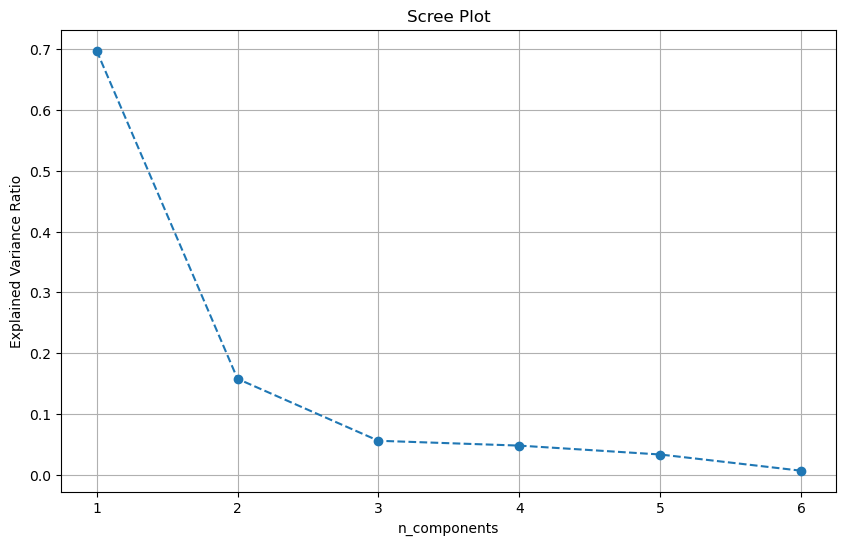

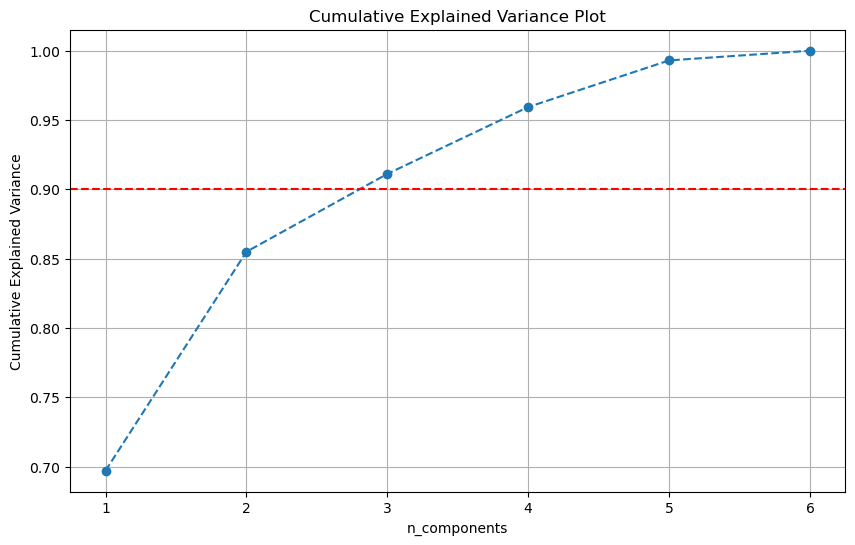

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

ev = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('n_components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(ev) + 1, 1))
plt.grid()
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(ev)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 1))
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')  # T hreshold at 90%
plt.show()

Our PCA will perform best when using 3 components, as seen by the plots above. SVD Could have also been used to determine the number of components, as we have previously done in class.

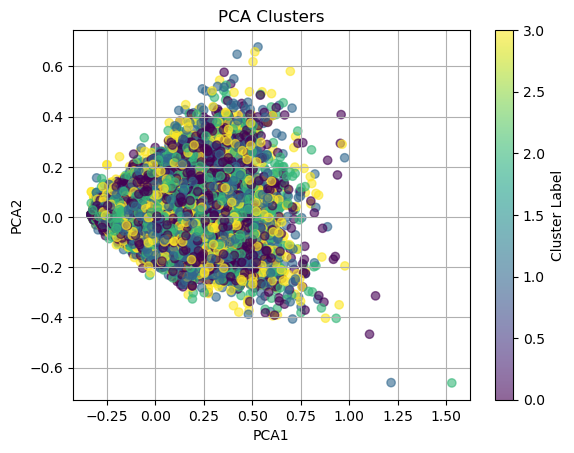

In [ ]:
pca = PCA(n_components= 3)
pca_df = pd.DataFrame(pca.fit_transform(X_train))
pca_df['Labels'] = nbadf_2.PPG_Bins

plt.figure()
plt.scatter(pca_df[0], pca_df[1],
            c=pca_df['Labels'],
            alpha=0.6)
plt.title('PCA Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [ ]:
feature = 0
hi_feat = -1
hi_weight = -1
for i in pca.components_[0]:
    if i > hi_weight and i > 0:
        hi_feat = feature
        hi_weight = i
    feature += 1

print('Feature with the highest positive weight:')
print(hi_feat, hi_weight)

Feature with the highest positive weight:
2 0.5332522367803033


Our dataset results in poor PCA clustering for a few reasons.
First, our PCA graph has a wedge shape due to the abscence of negative values. This can also be seen by plotting a histogram of PPG; our data is right skewed as more players have small points scored per game, while a few "Power Forwards" score the bulk of a team's points. The second reason is most likely due to the standardization performed on each variable prior to PCA.
As such, we will be using SVD with 3 components

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=3, n_iter=1000, random_state=76)
svd.fit(X_train)
sv = svd.singular_values_

right_matrix = pd.DataFrame(svd.components_)
right_matrix.shape # lets check the shape

left_matrix = pd.DataFrame(svd.fit_transform(X_train))/ sv
left_matrix.shape

(19310, 3)

To better visualize what our SVD looks like, we will use a pairplot showing each of the 3 components of the left and right matrices we have created.

In [ ]:
import seaborn as sns
def generate_plot(svd):
    sv = svd.singular_values_
    left_matrix = pd.DataFrame(svd.transform(X_train)) / sv
    right_matrix = pd.DataFrame(svd.components_)
    
    # Left matrix pairplot
    plt.figure(figsize=(10, 8))
    sns.pairplot(left_matrix)
    plt.suptitle("Pairplot of Left Matrix (Transformed Features)", y=1.02)
    plt.show()
    
    # Right matrix pairplot
    plt.figure(figsize=(10, 8))
    sns.pairplot(right_matrix.T)
    plt.suptitle("Pairplot of Right Matrix (Components)", y=1.02)
    plt.show()

<Figure size 1000x800 with 0 Axes>

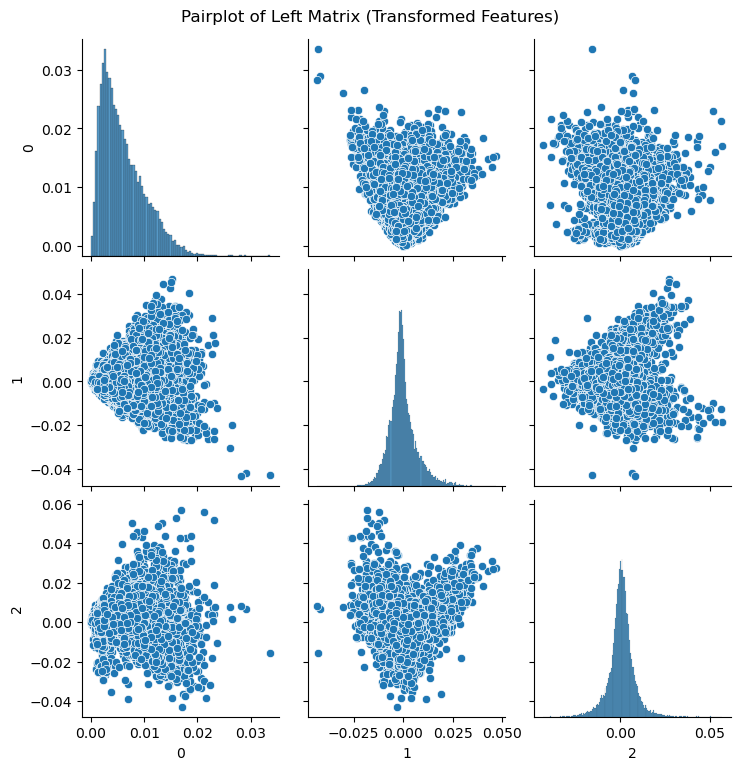

<Figure size 1000x800 with 0 Axes>

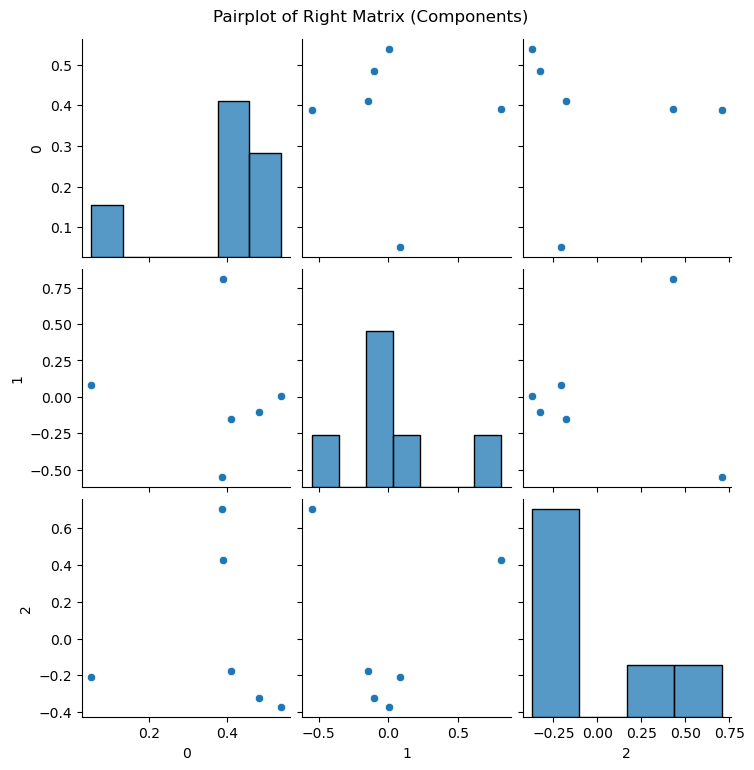

In [ ]:
generate_plot(svd)

Now we can see why our PCA did not produce good clusters. Our vertical plots of n=2 and n=3 show a unmimodal distribution. Had our data shown multiple peaks, clustering would have become more noticeable.

Due to the small amount of observations in our right matrix, very little significant information is available that the left matrix is does not already produce.

Finally, we can perform logistic regression by fitting a regressor on our transformed training data, predicting our test data, and comparing our resulting predictions with our actual y values using classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Transform both training and testing data using SVD
X_train_svd = pd.DataFrame(svd.transform(X_train), index=X_train.index)
X_test_svd = pd.DataFrame(svd.transform(X_test), index=X_test.index)

# Step 2: Fit a classifier on the transformed training data
classifier = LogisticRegression()
classifier.fit(X_train_svd, y_train)

# Step 3: Predict on the transformed test data
y_pred = classifier.predict(X_test_svd)

# Optional: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8411350455675228

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1200
           1       0.78      0.79      0.78      1191
           2       0.80      0.78      0.79      1197
           3       0.92      0.89      0.90      1240

    accuracy                           0.84      4828
   macro avg       0.84      0.84      0.84      4828
weighted avg       0.84      0.84      0.84      4828



Our test accuracy hovers around roughly 84%. We would need to run these models again without seeding to determine its true efficacy

In [ ]:
y_pred2 = classifier.predict(X_train_svd)

print("Accuracy:", accuracy_score(y_train, y_pred2))
print("\nClassification Report:\n", classification_report(y_train, y_pred2))

Accuracy: 0.8406007250129467

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4835
           1       0.77      0.77      0.77      4843
           2       0.80      0.80      0.80      4837
           3       0.92      0.89      0.91      4795

    accuracy                           0.84     19310
   macro avg       0.84      0.84      0.84     19310
weighted avg       0.84      0.84      0.84     19310



Running the prediction on our training data also produces a similar accuracy score. This is indicative of the SVD improving our predictive probability when classifying Points Per Game as a categorical variable. Should we increase the bins (for example, from quartiles to deciles), our accuracy would decrease slightly, but it would provide a significantly better predictor in comparison to running linear regression on the normalized PPG.